In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = '/content/sample_data/Lung Cancer Prediction.csv'

# 파일 불러오기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Remove unnecessary columns
df_cleaned = df.drop(columns=["index", "Patient Id"])

# 2. Encode the target variable 'Level'
label_encoder = LabelEncoder()
df_cleaned["Level"] = label_encoder.fit_transform(df_cleaned["Level"])

# Check encoding result
encoded_levels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df_cleaned.head(), encoded_levels

(   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
 0   33       1              2            4             5   
 1   17       1              3            1             5   
 2   35       1              4            5             6   
 3   37       1              7            7             7   
 4   46       1              6            8             7   
 
    OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
 0                     4             3                     2              2   
 1                     3             4                     2              2   
 2                     5             5                     4              6   
 3                     7             6                     7              7   
 4                     7             7                     6              7   
 
    Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
 0        4  ...        3            4                    2         2   
 1        

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 데이터 분할
X = df_cleaned.drop(columns=["Level"])
y = df_cleaned["Level"]

# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# 랜덤 포레스트 훈련
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

1.0

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 클래스 자동 인식
classes = np.unique(y_test)

# 이진화
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

# 다중 클래스 AUC 계산
auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print("Macro AUC:", round(auc_score, 3))

Macro AUC: 1.0


In [ ]:
confusion_matrix(y_test, y_pred)

array([[73,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 66]])

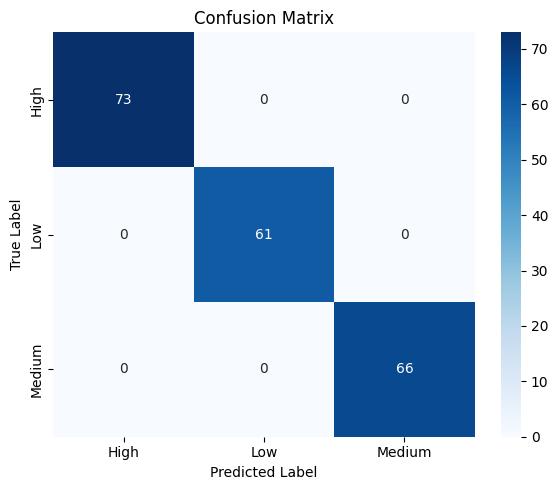

array([[73,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 66]])

In [ ]:
# 혼동 행렬 계산 및 시각화
conf_mat = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

conf_mat

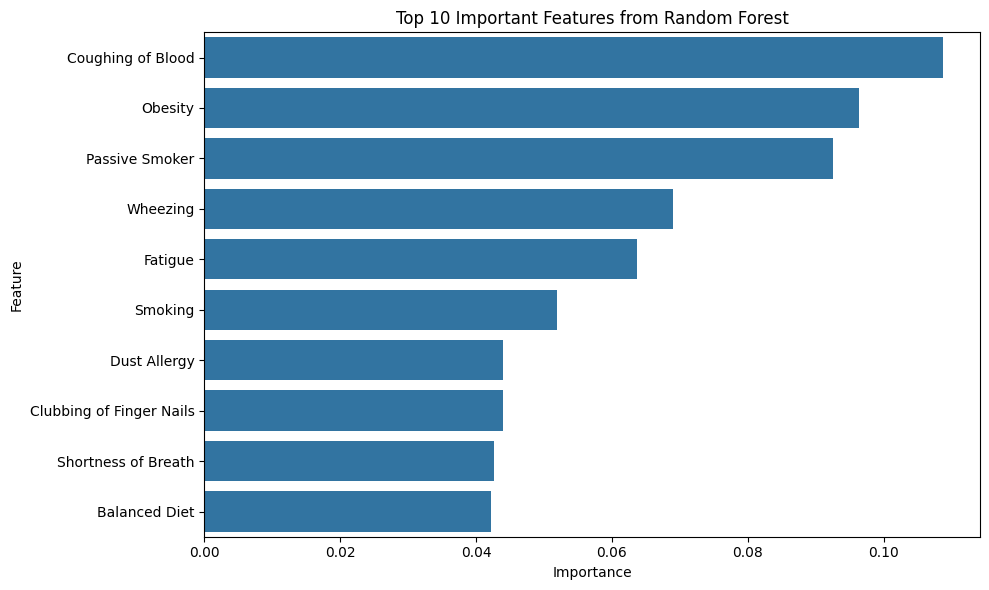

,Feature,Importance
13,Coughing of Blood,0.108726
9,Obesity,0.096352
11,Passive Smoker,0.092527
17,Wheezing,0.068955
14,Fatigue,0.063759
10,Smoking,0.051886
4,Dust Allergy,0.044032
19,Clubbing of Finger Nails,0.043964
16,Shortness of Breath,0.042637
8,Balanced Diet,0.042251


from matplotlib import pyplot as plt
top_features['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_features['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상위 10개 변수 시각화
top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x="Importance", y="Feature")
plt.title("Top 10 Important Features from Random Forest")
plt.tight_layout()
plt.show()

top_features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 상위 10개 중요 변수만 추출
selected_features = top_features["Feature"].tolist()
X_top = df_cleaned[selected_features]

# 데이터 분할
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, stratify=y, random_state=42, test_size=0.2
)

# 스케일링 (로지스틱 회귀에 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# 로지스틱 회귀 모델 학습
logreg = LogisticRegression(max_iter=1000, multi_class="multinomial")
logreg.fit(X_train_scaled, y_train)

# 예측 및 평가
y_pred = logreg.predict(X_test_scaled)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


('              precision    recall  f1-score   support\n\n        High       1.00      1.00      1.00        73\n         Low       1.00      1.00      1.00        61\n      Medium       1.00      1.00      1.00        66\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n',
 array([[73,  0,  0],
        [ 0, 61,  0],
        [ 0,  0, 66]]))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


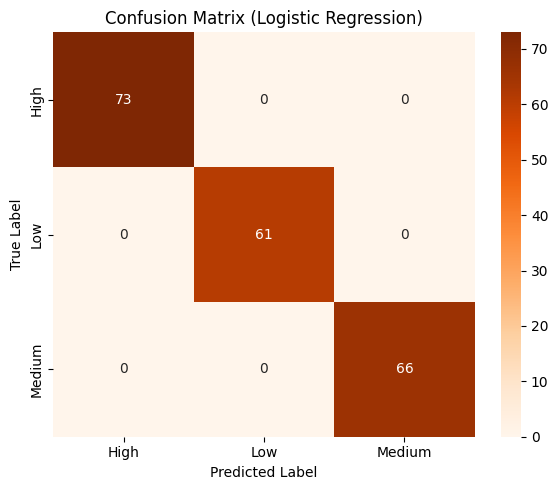

In [ ]:

# 로지스틱 회귀 모델 학습
log_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_model.fit(X_train_scaled, y_train)

# 예측 및 혼동 행렬 계산
y_pred_log = log_model.predict(X_test_scaled)
conf_mat_log = confusion_matrix(y_test, y_pred_log)

# 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_log, annot=True, fmt='d', cmap='Oranges',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# 클래스별 로지스틱 회귀 계수 확인
coef_df = pd.DataFrame(logreg.coef_, columns=selected_features)
coef_df["Target Class"] = label_encoder.classes_

# 컬럼 순서 정리
cols = ["Target Class"] + selected_features
coef_df = coef_df[cols]

coef_df


,Target Class,Coughing of Blood,Obesity,Passive Smoker,Wheezing,Fatigue,Smoking,Dust Allergy,Clubbing of Finger Nails,Shortness of Breath,Balanced Diet
0,High,2.449231,0.873920,2.628757,1.109631,2.549968,0.905927,0.018766,1.735374,0.975892,0.648365
1,Low,-2.264216,-1.944478,-2.002282,-2.443371,-2.725989,-0.888444,0.056760,-2.084316,-0.571823,0.454110
2,Medium,-0.185014,1.070558,-0.626475,1.333740,0.176021,-0.017483,-0.075526,0.348943,-0.404068,-1.102475


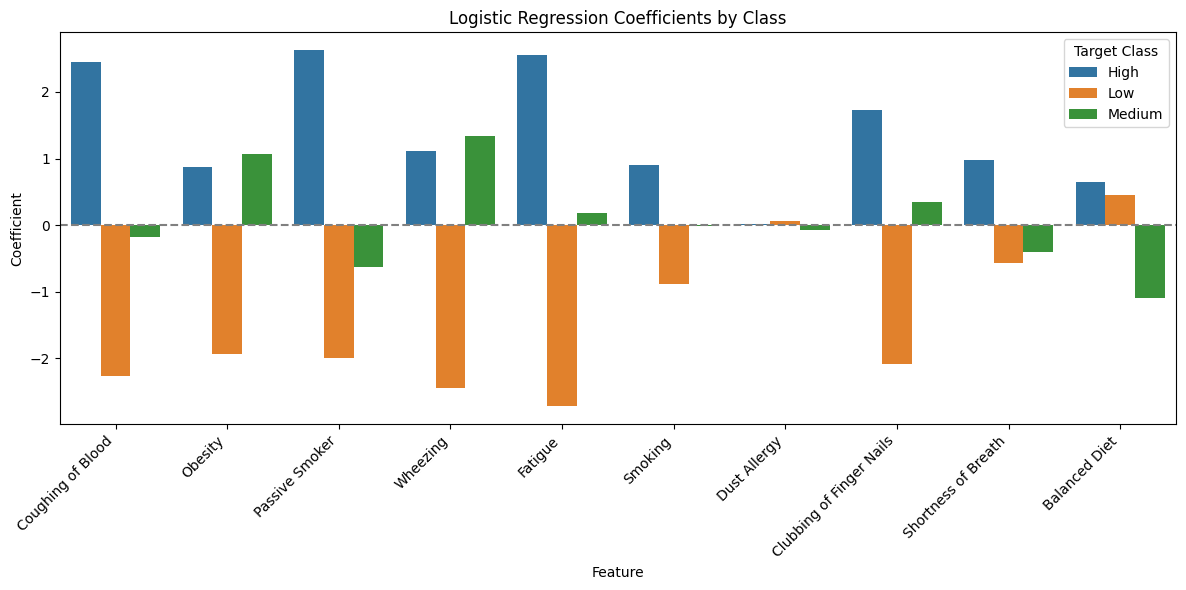

In [ ]:
import matplotlib.pyplot as plt

# Melt 데이터프레임으로 변환하여 시각화 준비
coef_melted = coef_df.melt(id_vars="Target Class", var_name="Feature", value_name="Coefficient")

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_melted, x="Feature", y="Coefficient", hue="Target Class")
plt.title("Logistic Regression Coefficients by Class")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
